,KP From,KP To,HOOS Sigma,In Specs
Run,,,,
1,-0.0120,0.0902,0.2757,Marginal
2,0.0908,0.1157,0.1377,Good
3,0.1160,0.1651,0.1503,Marginal
4,0.1653,0.3166,0.1481,Good


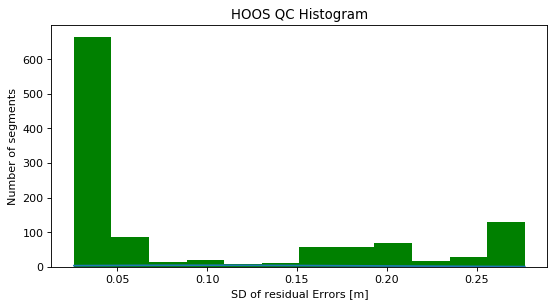

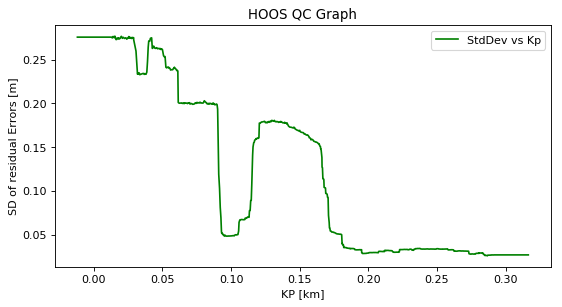

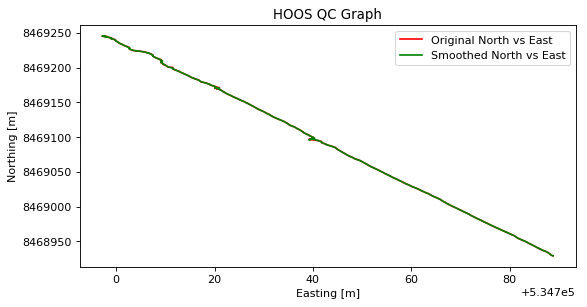

,KP From,KP To,VOOS Sigma,In Specs
Run,,,,
1,-0.0120,0.3166,0.1328,Good


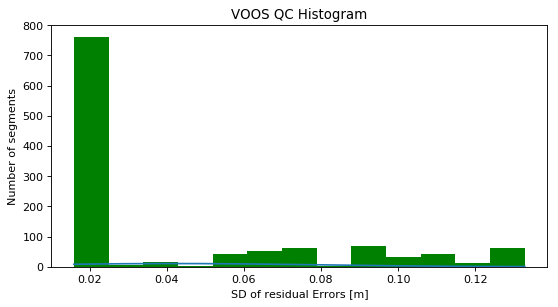

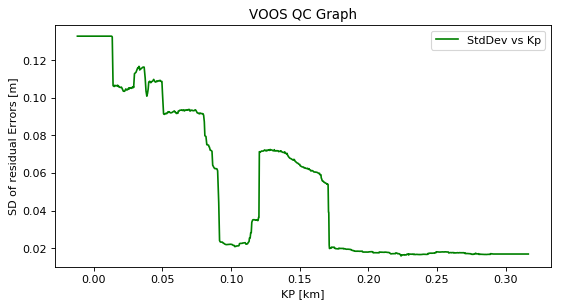

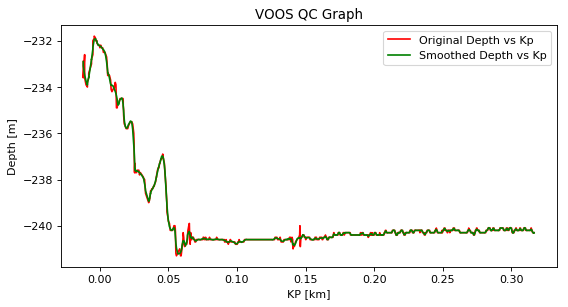

In [12]:
%matplotlib inline
import os
import sys
import math
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial import distance
from IPython.display import display, HTML
from copy import deepcopy
from enum import Enum
from IPython.utils import io
import scipy.stats as stats
# Constants and Enums ---------------------------------------------------------
windowSize = 11
viewingWindow = 0.05
#trackFileName= "MPC127106_WEL_OOS_TestTrack3_1m.csv"
trackFileName= "MPC127106_WEL_OOS_Track3_0.2m.csv"
#trackFileName= "OOS_Woodside_Run1_Rotated.txt"

class InSpec(Enum):
    accepted = 0.15
    unAccepted = 0.3

class InSpecMessage(Enum):
    good = "Good" 
    bad = "Bad" 
    marginal = "Marginal"

# Code classes ----------------------------------------------------------------
class Record:
    def __init__(self, kp, x, y, z):
        self.kp = kp
        self.x = x
        self.y = y
        self.z = z
class OosStats():
    def __init__(self):
        self.kps = []
        self.sigmas = []
    
    def calculateVerticalStats(self, trackRecs, smoothRecs, viewingWindow):
        """ This method calculates the standard deviation of distances between
         the first 25 meter points (concidering 50 meter viewing window)
         and assign it to all of them. it then continues with points who 
         have points available at the left and right 25 meters and calculate 
         the standard deviation and assign them to those points. For the last 25 meters
         it does something similar than the first 25 meters points """
        
        kpInterval = viewingWindow
        midInterval = viewingWindow / 2
        n = len(trackRecs)
        limitReached = False
        for index in range(n):
            if limitReached:
                self.kps.append(trackRecs[index].kp)
                self.sigmas.append(sigmaCache)
                continue
            segment = 0
            segmentLeft = 0
            segmentRight = 0
            count = 0
            leftCount = 0
            rightCount = 0

            kpArray = []
            kpArrayLeft = []
            kpArrayRight = []
            kpSmoothArray = []
            kpSmoothArrayLeft = []
            kpSmoothArrayRight = []

            zArray = []
            zArrayLeft = []
            zArrayRight = []
            zSmoothArray = []
            zSmoothArrayLeft = []
            zSmoothArrayRight = []

            distances = []

            if index == 0:
                while segment < kpInterval:
                    kpArray.append(trackRecs[index + count].kp)
                    zArray.append(trackRecs[index + count].z)
                    kpSmoothArray.append(smoothRecs[index + count].kp)
                    zSmoothArray.append(smoothRecs[index + count].z)
                    if count > 0:
                        segment = segment + abs(kpArray[count] - kpArray[count - 1])
                    count +=1
                dist = 0
                for i in range(len(kpArray)):
                    dist = distance.euclidean([kpSmoothArray[i], zSmoothArray[i]],[kpArray[i], zArray[i]])
                    distances.append(dist)
                distanceStd = np.std(np.array(distances))
                sigmaCache = distanceStd
           
            if abs(trackRecs[index].kp -trackRecords[0].kp) < midInterval:
                self.kps.append(trackRecs[index].kp)
                self.sigmas.append(sigmaCache)
                continue

            while segmentLeft < midInterval:
                kpArrayLeft.insert(0, trackRecs[index - leftCount].kp)
                zArrayLeft.insert(0, trackRecs[index - leftCount].z)
                kpSmoothArrayLeft.insert(0, smoothRecs[index - leftCount].kp)
                zSmoothArrayLeft.insert(0, smoothRecs[index - leftCount].z)
                if leftCount > 0:
                     segmentLeft = segmentLeft + abs(kpArrayLeft[1] - kpArrayLeft[0])
                leftCount +=1

            while segmentRight < midInterval:
                if index + rightCount > n - 2:
                    limitReached = True
                    break
                kpArrayRight.append(trackRecs[index + rightCount + 1].kp)
                zArrayRight.append(trackRecs[index + rightCount + 1].z)
                kpSmoothArrayRight.append(smoothRecs[index + rightCount + 1].kp)
                zSmoothArrayRight.append(smoothRecs[index + rightCount + 1].z)

                if rightCount > 0:
                    segmentRight = segmentRight + abs(kpArrayRight[rightCount] -  kpArrayRight[rightCount - 1])
                rightCount +=1

            kpArray.extend(kpArrayLeft)
            kpArray.extend(kpArrayRight)
            zArray.extend(zArrayLeft)
            zArray.extend(zArrayRight)

            kpSmoothArray.extend(kpSmoothArrayLeft)
            kpSmoothArray.extend(kpSmoothArrayRight)
            zSmoothArray.extend(zSmoothArrayLeft)
            zSmoothArray.extend(zSmoothArrayRight)

            dist = 0
            for i in range(len(kpArray)):
                dist = distance.euclidean([kpSmoothArray[i], zSmoothArray[i]],[kpArray[i], zArray[i]])
                distances.append(dist)
            distanceStd = np.std(np.array(distances))
            sigmaCache = distanceStd
            self.kps.append(trackRecs[index].kp)
            self.sigmas.append(distanceStd)

    def calculateHorizontalStats(self, trackRecs, smoothRecs, viewingWindow):
        """ This method calculates the standard deviation of distances between
         the first 25 meter points (concidering 50 meter viewing window)
         and assign it to all of them. it then continues with points who 
         have points available at the left and right 25 meters and calculate 
         the standard deviation and assign them to those points. For the last 25 meters
         it does something similar than the first 25 meters points """

        kpInterval = viewingWindow
        midInterval = viewingWindow / 2
        # interval = viewingWindow * 1000 / 2
        n = len(trackRecs)
        limitReached = False
        for index in range(n):
            if limitReached:
                self.kps.append(trackRecs[index].kp)
                self.sigmas.append(sigmaCache)
                continue
            segment = 0
            segmentLeft = 0
            segmentRight = 0
            count = 0
            leftCount = 0
            rightCount = 0

            kpArray = []
            kpArrayLeft = []
            kpArrayRight = []
            kpSmoothArray = []
            kpSmoothArrayRight = []
            kpSmoothArrayLeft = []

            xArray = []
            xArrayLeft = []
            xArrayRight = []
            xSmoothArray = []
            xSmoothArrayLeft = []
            xSmoothArrayRight = []

            yArray = []
            yArrayLeft = []
            yArrayRight = []
            ySmoothArray = []
            ySmoothArrayLeft = []
            ySmoothArrayRight = []

            distances = []

            if index == 0:
                while segment < kpInterval:
                    kpArray.append(trackRecs[index + count].kp)
                    xArray.append(trackRecs[index + count].x)
                    yArray.append(trackRecs[index + count].y)
                    kpSmoothArray.append(smoothRecs[index + count].kp)
                    xSmoothArray.append(smoothRecs[index + count].x)
                    ySmoothArray.append(smoothRecs[index + count].y)
                    if count > 0:
                        segment = segment + abs(kpArray[count] - kpArray[count - 1])
                    count +=1
                dist = 0
                for i in range(len(kpArray)):
                    dist = distance.euclidean([xSmoothArray[i], ySmoothArray[i]],[xArray[i], yArray[i]])
                    distances.append(dist)
                distanceStd = np.std(np.array(distances))
                sigmaCache = distanceStd
           
            if abs(trackRecs[index].kp -trackRecords[0].kp) < midInterval:
                self.kps.append(trackRecs[index].kp)
                self.sigmas.append(sigmaCache)
                continue

            while segmentLeft < midInterval:
                kpArrayLeft.insert(0, trackRecs[index - leftCount].kp)
                xArrayLeft.insert(0, trackRecs[index - leftCount].x)
                yArrayLeft.insert(0, trackRecs[index - leftCount].y)
                kpSmoothArrayLeft.insert(0, smoothRecs[index - leftCount].kp)
                xSmoothArrayLeft.insert(0, smoothRecs[index - leftCount].x)
                ySmoothArrayLeft.insert(0, smoothRecs[index - leftCount].y)
                if leftCount > 0:
                     segmentLeft = segmentLeft + abs(kpArrayLeft[1] - kpArrayLeft[0])
                leftCount +=1

            while segmentRight < midInterval:
                if index + rightCount > n - 2:
                    limitReached = True
                    break
                kpArrayRight.append(trackRecs[index + rightCount + 1].kp)
                xArrayRight.append(trackRecs[index + rightCount + 1].x)
                yArrayRight.append(trackRecs[index + rightCount + 1].y)
                kpSmoothArrayRight.append(smoothRecs[index + rightCount + 1].kp)
                xSmoothArrayRight.append(smoothRecs[index + rightCount + 1].x)
                ySmoothArrayRight.append(smoothRecs[index + rightCount + 1].y)
                if rightCount > 0:
                    segmentRight = segmentRight + abs(kpArrayRight[rightCount] -  kpArrayRight[rightCount - 1])
                rightCount +=1

            kpArray.extend(kpArrayLeft)
            kpArray.extend(kpArrayRight)
            xArray.extend(xArrayLeft)
            xArray.extend(xArrayRight)
            yArray.extend(yArrayLeft)
            yArray.extend(yArrayRight)

            kpSmoothArray.extend(kpSmoothArrayLeft)
            kpSmoothArray.extend(kpSmoothArrayRight)
            xSmoothArray.extend(xSmoothArrayLeft)
            xSmoothArray.extend(xSmoothArrayRight)
            ySmoothArray.extend(ySmoothArrayLeft)
            ySmoothArray.extend(ySmoothArrayRight)

            dist = 0
            for i in range(len(kpArray)):
                dist = distance.euclidean([xSmoothArray[i], ySmoothArray[i]],[xArray[i], yArray[i]])
                distances.append(dist)
            distanceStd = np.std(np.array(distances))
            sigmaCache = distanceStd
            self.kps.append(trackRecs[index].kp)
            self.sigmas.append(distanceStd)
       
# Utilities -------------------------------------------------------------------
def color_inSpec(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: color name (i.e. red)'`
    for in Spec strings, black otherwise.
    """
    if val == InSpecMessage.bad.value:
        color = 'red'
    elif val == InSpecMessage.marginal.value:
        color = 'orange'
    elif val == InSpecMessage.good.value:
        color = 'green'
    else:
        color = 'black'
        
    #color = 'red' if val == "UnAcceptable" else 'black'
    return 'color: %s' % color


# Functions--------------------------------------------------------------------
def importCsv(trackFile):
    trackRecs = []
    if os.path.isfile(trackFile):
        with open(trackFile, 'r') as fs:
            for line in fs:
                kp, x, y, z = line.split(',')
                record = Record(float(kp), float(x), float(y), float(z))
                trackRecs.append(record)
    else:
        print("{0} does not exist".format(trackFile))
        sys.exit(1)
    return trackRecs

def ExportToCsv(records, fileName):
    name , ext = os.path.splitext(fileName)
    fileNameAdj = name + "_Smoothed" + ext
    with open(fileNameAdj, 'w') as fs:
        for rec in records[:-1]:
            line = "{0:.4f},{1:.4f},{2:.4f},{3:.4f} \n".format(rec.kp, rec.x, rec.y, rec.z)
            fs.write(line)
         # To prevent adding new blank line after the last record
        rec = records[-1]
        line = "{0:.4f},{1:.4f},{2:.4f},{3:.4f}".format(rec.kp, rec.x, rec.y, rec.z)
        fs.write(line)

def GetVerticalSmoothRecords(trackRecs, windowSize):
    """ This method uses the 11 points (for window size = 11) smoothing algorithm """
    midSize = windowSize // 2
    index = 0
    numPoints = len(trackRecs)
    SmoothedRecs = deepcopy(trackRecs)

    while index <= numPoints - windowSize:
        kpArray = []
        zArray = []
        for i in range(index, index + windowSize):
            kpArray.append(trackRecs[i].kp)
            zArray.append(trackRecs[i].z)
        coefs = poly.polyfit(kpArray, zArray, 2)
        ffit = poly.Polynomial(coefs)
        SmoothedRecs[index + midSize].z = ffit(kpArray[midSize])
        if index == 0:
            for j in range(1, midSize):
                SmoothedRecs[j].z = ffit(kpArray[j])
        if index == numPoints - windowSize:
            for k in range(midSize + 1, len(kpArray) - 1):
                SmoothedRecs[index + k].z = ffit(kpArray[k])
        index +=1
   
    return SmoothedRecs

def GetHorizontalSmoothRecords(trackRecs, windowSize):
    """ This method uses the 11 points (for window size = 11) smoothing algorithm """
    midSize = windowSize // 2
    index = 0
    numPoints = len(trackRecs)
    SmoothRecs = [rec for rec in trackRecs]

    while index <= numPoints - windowSize:
        xArray = []
        yArray = []
        for i in range(index, index + windowSize):
            xArray.append(trackRecs[i].x)
            yArray.append(trackRecs[i].y)
        coefs = poly.polyfit(xArray, yArray, 2)
        ffit = poly.Polynomial(coefs)
        SmoothRecs[index + midSize].y = ffit(xArray[midSize])
        if index == 0:
            for j in range(1, midSize):
                SmoothRecs[j].y = ffit(xArray[j])
        if index == numPoints - windowSize:
            for k in range(midSize + 1, len(xArray) - 1):
                SmoothRecs[index + k].y = ffit(xArray[k])
        index +=1
   
    return SmoothRecs

def GetStatsForReporting(oosStatsInstance):
    """ This method generates the output used in reporting
    it keeps the furthest kp as 'kp to' while in specs are not changed """
    kpFroms =[]
    kpTos = []
    inSpecs = []
    inSpecsTemp = []
    sigmas = []
    for sigma in oosStatsInstance.sigmas:
        if round(sigma, 4) <= InSpec.accepted.value:
            inSpecsTemp.append(InSpecMessage.good.value)
        elif  round(sigma, 4) > InSpec.accepted.value and round(sigma, 4) < InSpec.unAccepted.value:
            inSpecsTemp.append(InSpecMessage.marginal.value)
        else:
            inSpecsTemp.append(InSpecMessage.bad.value)
    
    kpFroms.append(oosStatsInstance.kps[0])
    kpTos.append(oosStatsInstance.kps[0])
    sigmas.append(oosStatsInstance.sigmas[0])

    inSpec = inSpecsTemp[0]
    inSpecs.append(inSpec)

    run = 1
    runs= []
    runs.append(run)
    i = 0
    j = 0
    while i < len(oosStatsInstance.kps):
        if inSpec == inSpecsTemp[i]:
            kpTos[j] = oosStatsInstance.kps[i]
        else:
            kpFroms.append(oosStatsInstance.kps[i])
            inSpec = inSpecsTemp[i]
            inSpecs.append(inSpec)
            kpTos.append(oosStatsInstance.kps[i])
            sigmas.append(oosStats.sigmas[i])
            run +=1
            runs.append(run)
            j +=1

        i += 1
    return runs, kpFroms, kpTos, sigmas, inSpecs


# Start the process -----------------------------------------------------------
trackRecords = importCsv(trackFileName)
plt.rcParams['figure.figsize'] = [8, 4]
plt.rcParams['figure.dpi'] = 80

# Horizontal process ----------------------------------------------------------
horizontalSmoothRecords = GetHorizontalSmoothRecords(deepcopy(trackRecords), windowSize)
oosStats = OosStats()
# Hoos Report
oosStats.calculateHorizontalStats(deepcopy(trackRecords), horizontalSmoothRecords, viewingWindow)
runs, kpFroms, kpTos, sigmas, inSpecs = GetStatsForReporting(oosStats)
d = {
    'Run' : pd.Series([run for run in runs]),
    'KP From' : pd.Series(["{0:.4f}".format(kpFrom) for kpFrom in kpFroms]),
    'KP To' : pd.Series(["{0:.4f}".format(kpTo) for kpTo in kpTos]),
    'HOOS Sigma' : pd.Series(["{0:.4f}".format(sigma) for sigma in sigmas]),
    'In Specs' : pd.Series([inSpec for inSpec in inSpecs]),
    }
hDataFrame = pd.DataFrame(d, columns = ['Run', 'KP From', 'KP To', 'HOOS Sigma', 'In Specs'] )
#hDataFrame = hDataFrame[['Run', 'KP From', 'KP To', 'HOOS Sigma', 'In Specs']]

hDataFrame.set_index('Run', inplace=True)

display(HTML("<br/><b> Horizontal OOS QC</b>"))
display(hDataFrame.style.applymap(color_inSpec))
#print(hDataFrame)

# ploting
xArrayTrack = [rec.x for rec in trackRecords]
yArrayTrack = [rec.y for rec in trackRecords]
xArrayHorizontalSmooth = [rec.x for rec in horizontalSmoothRecords]
yArrayHorizontalSmooth = [rec.y for rec in horizontalSmoothRecords]

# Plot SD histogram
sortedSigmas = sorted(oosStats.sigmas)
histoMean = np.mean(sortedSigmas)
histoSd = np.std(sortedSigmas)
pdf = stats.norm.pdf(sortedSigmas, histoMean, histoSd)
plt.plot(sortedSigmas, pdf)
plt.hist(sortedSigmas, bins='auto', color='green')
plt.title('HOOS QC Histogram')
plt.xlabel('SD of residual Errors [m]')
plt.ylabel('Number of segments')
plt.show()


# Plot SD vs KP
plt.plot(oosStats.kps, oosStats.sigmas, color = 'green', label='StdDev vs Kp')
plt.title('HOOS QC Graph')
plt.xlabel('KP [km]')
plt.ylabel('SD of residual Errors [m]')
plt.legend(loc='upper right')
plt.show()


# Plot original and smoothed track
plt.plot(xArrayTrack, yArrayTrack, color = 'red', label = 'Original North vs East')
plt.plot(xArrayHorizontalSmooth, yArrayHorizontalSmooth, color = 'green', label = 'Smoothed North vs East')

plt.title('HOOS QC Graph')
plt.xlabel('Easting [m]')
plt.ylabel('Northing [m]')
plt.legend(loc='upper right')
plt.show()

# Vertical process ------------------------------------------------------------
verticalSmoothRecords = GetVerticalSmoothRecords(deepcopy(trackRecords), windowSize)
oosStats = OosStats()
# Voos Report
oosStats.calculateVerticalStats(trackRecords, verticalSmoothRecords, viewingWindow)
runs, kpFroms, kpTos, sigmas, inSpecs = GetStatsForReporting(oosStats)

d = {
    'Run' : pd.Series([run for run in runs]),
    'KP From' : pd.Series(["{0:.4f}".format(kpFrom) for kpFrom in kpFroms]),
    'KP To' : pd.Series(["{0:.4f}".format(kpTo) for kpTo in kpTos]),
    'VOOS Sigma' : pd.Series(["{0:.4f}".format(sigma) for sigma in sigmas]),
    'In Specs' : pd.Series([inSpec for inSpec in inSpecs]),
    }
vDataFrame = pd.DataFrame(d, columns=['Run', 'KP From', 'KP To', 'VOOS Sigma', 'In Specs'])
#vDataFrame = vDataFrame[['Run', 'KP From', 'KP To', 'VOOS Sigma', 'In Specs']]
vDataFrame.set_index('Run', inplace=True)

display(HTML("<br/><b> Vertical OOS QC</b>"))
display(vDataFrame.style.applymap(color_inSpec))
#print(vDataFrame)

# ploting
kpArrayVerticalTrack = [rec.kp for rec in trackRecords]
zArrayVerticalTrack = [rec.z for rec in trackRecords]
kpArrayVerticalSmooth = [rec.kp for rec in verticalSmoothRecords]
zArrayVerticalSmooth = [rec.z for rec in verticalSmoothRecords]

# Plot SD histogram
sortedSigmas = sorted(oosStats.sigmas)
histoMean = np.mean(sortedSigmas)
histoSd = np.std(sortedSigmas)
pdf = stats.norm.pdf(sortedSigmas, histoMean, histoSd)
plt.plot(sortedSigmas, pdf)
plt.hist(sortedSigmas, bins='auto', color='green')
plt.title('VOOS QC Histogram')
plt.xlabel('SD of residual Errors [m]')
plt.ylabel('Number of segments')
plt.show()

# Plot SD vs KP
plt.plot(oosStats.kps, oosStats.sigmas, color = 'green', label='StdDev vs Kp')
plt.title('VOOS QC Graph')
plt.xlabel('KP [km]')
plt.ylabel('SD of residual Errors [m]')
plt.legend(loc='upper right')
plt.show()

# Plot original and smoothed track
plt.plot(kpArrayVerticalTrack, zArrayVerticalTrack, color = 'red', label = 'Original Depth vs Kp')
plt.plot(kpArrayVerticalSmooth, zArrayVerticalSmooth, color = 'green', label = 'Smoothed Depth vs Kp')
plt.title('VOOS QC Graph')
plt.xlabel('KP [km]')
plt.ylabel('Depth [m]')
plt.legend(loc='upper right')
plt.show()


<div style= "float: left">
<hr>
Party Chief
</div>
<div style= "float: right">
<hr>
Client Representative
</div>